Sizlere bir ağ trafiği verisi sunuyoruz. Bu veride hem meşru trafik hem de saldırı trafiği bulunmaktadır. Göreviniz, bu veriyi analiz etmek ve genel trafiği görselleştirmek için uygun yöntemleri kullanmaktır. Örnek olarak, içten içe ve içten dışa trafiğin yoğunluğunu belirlemek, en çok trafik yapan ve en çok veri indiren adresleri tespit etmek gibi durumları göz önünde bulundurabilirsiniz. Ayrıca, bu trafik verisi üzerinden bazı yaygın siber saldırıları tespit etmek de beklenmektedir.

 

İşte görevinizde yardımcı olabilecek bazı adımlar:

 

Veri Keşfi ve Temizleme: İlk adım olarak, veri setini inceleyiniz ve gerekiyorsa temizleyiniz. Anlamlı verileri ayıklamak ve anormallikleri tespit etmek için görselleştirmeler yapılmalıdır.

Trafik Analizi: Veri setini ayrıntılı olarak analiz edin. İçten içe ve içten dışa trafiği belirleyin, en yoğun zaman dilimlerini ve trafik kaynaklarını belirleyin.

Görselleştirme: Analiz sonuçlarını görselleştirerek sunum yapınız. Grafikler, tablolar gibi görsel araçları kullanarak trafiği anlamak ve sunmak daha etkili olabilir.

Siber Saldırı Tespiti: Port taraması, Bruteforce saldırıları ve ARP Scan, Exfiltration, Execution gibi siber saldırıları belirlemek için veriyi inceleyiniz. Bu saldırıları gerçekleştiren IP adreslerini ve hedef IP adreslerini tespit ediniz. Ayrıca, saldırıların zamanını da analiz ediniz.

Raporlama: Analiz sonuçlarını içeren kapsamlı bir rapor hazırlayınız. Raporunuzda, kullanılan metodolojiyi, bulguları ve tavsiyelerinizi açıkça belirtmeniz istenmektedir.

 

Bu case ile ilgili çalışırken Python kullanmayı ve kaynak kodlarınızı da paylaşmayı unutmayınız. Bu case için geri dönüş süresi 1 haftadır. Tüm adımların tamamlanması şart değildir.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\NextRay\ds_mulakat.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13452\926143714.py:1: DtypeWarning: Columns (102,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\NextRay\ds_mulakat.csv')


In [4]:
df1 = df.copy()

In [5]:
df.head()

,sync_name,source_address,destination_address,source_port,destination_port,protocol,app_protocol,application_name,application_category_name,master_application_name,tunnel_source_address,tunnel_destination_address,source_mac,destination_mac,tunnel_value,package_count,login_fail_count,login_success,expiration_id,drop_eligible,priority,vlan_identifier,event_time,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_bytes,bidirectional_max_piat_ms,bidirectional_max_ps,bidirectional_mean_piat_ms,bidirectional_mean_ps,bidirectional_min_piat_ms,bidirectional_min_ps,bidirectional_packets,bidirectional_stddev_piat_ms,bidirectional_stddev_ps,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,src2dst_max_piat_ms,src2dst_max_ps,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,dst2src_max_piat_ms,dst2src_max_ps,dst2src_mean_piat_ms,dst2src_mean_ps,dst2src_min_piat_ms,dst2src_min_ps,dst2src_stddev_piat_ms,dst2src_stddev_ps,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,is_username,username,username_arr,is_hostname,source_hostname,source_hostname_arr,destination_hostname,destination_hostname_arr,domain,domain_arr,dns_query_name,dns_query_len,dns_query_type,dns_answer_name,dns_answer_len,dns_answer_type,dns_answer_addresses,dns_not_exist,dns_server_direction,dns_query_main_domain,dns_query_sub_domain,dns_query_has_sub_domain,DNS,status,status_code,request_host,request_type,request_uri,request_uri_arr,user_agent,first_http_post_body,http_request,bidirectional_http_request_count,bidirectional_get_request_count,bidirectional_get_request_bytes,bidirectional_post_request_count,bidirectional_post_request_bytes,src2dst_get_request_bytes,src2dst_post_request_bytes,dst2src_get_request_bytes,dst2src_post_request_bytes,HTTP,ja3_client,ja3_server,mail_sender,mail_recipient,file_transport,ntlmssp_auth_seen,LdapUserInfo,ICMP,SMB2Status,Flow_Risks,Kerberos,server_side_using_capability,UserBehavior,personnel_info,DeviceOnNetwork,direction,day,day_of_week,hour_of_day,location_id,bidirectional_first_seen_ms_ts,bidirectional_last_seen_ms_ts,sourceCountry,destinationCountry,sourceGeoPoint,destinationGeoPoint,src_asn,dst_asn,nbns_conflict_count,ndr_name,source_type,destination_type,session_id,session_id_from_time,protocol_name,source_asset_type,destination_asset_type
0,master-node,192.168.2.100,192.168.0.1,0,0,0,1000,ARP-Request,ARP,ARP,NaN,NaN,00:50:56:a6:4d:5e,ff:ff:ff:ff:ff:ff,0,1,0,0,0,False,0,0,2024-03-18T14:07:19.738372034Z,1710770835765056,1710770835765056,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,False,NotFound,[''NotFound''],False,exc03,[''\x12\x04\x10exc03''],192.168.0.1,NaN,NotFound,[''NotFound''],NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,"{''large_package_count'': 0, ''dns_query_count...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,{''reversed'': False},NaN,NaN,NotFound,NaN,False,False,"{''user_name'': '''', ''title_name'': '''', ''...","{''icmp_type_code'': 0, ''icmp_type'': 0, ''ic...","{''smb2message_id'': None, ''smb2file_message_...","{''risk'': '''', ''risk_severity'': '''', ''ri...","{''auth_service_status'': False, ''tag_status'...",NaN,"{''type'': ''Internal'', ''country'': '''', ''...","{''department'': '''', ''title'': '''', ''user...

In [6]:
df.shape

(160983, 165)

In [7]:
pd.concat(df.iloc[:,:100].info(),df.iloc[:,100:].info(),axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160983 entries, 0 to 160982
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sync_name                     160983 non-null  object 
 1   source_address                160983 non-null  object 
 2   destination_address           160983 non-null  object 
 3   source_port                   160983 non-null  int64  
 4   destination_port              160983 non-null  int64  
 5   protocol                      160983 non-null  int64  
 6   app_protocol                  160983 non-null  int64  
 7   application_name              160983 non-null  object 
 8   application_category_name     160983 non-null  object 
 9   master_application_name       160983 non-null  object 
 10  tunnel_source_address         0 non-null       float64
 11  tunnel_destination_address    0 non-null       float64
 12  source_mac                    160983 non-nu

C:\Users\Admin\AppData\Local\Temp\ipykernel_13452\2069997279.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(df.iloc[:,:100].info(),df.iloc[:,100:].info(),axis=1)


TypeError: concat() got multiple values for argument 'axis'

In [8]:
list(df.columns)

['sync_name',
 'source_address',
 'destination_address',
 'source_port',
 'destination_port',
 'protocol',
 'app_protocol',
 'application_name',
 'application_category_name',
 'master_application_name',
 'tunnel_source_address',
 'tunnel_destination_address',
 'source_mac',
 'destination_mac',
 'tunnel_value',
 'package_count',
 'login_fail_count',
 'login_success',
 'expiration_id',
 'drop_eligible',
 'priority',
 'vlan_identifier',
 'event_time',
 'bidirectional_first_seen_ms',
 'bidirectional_last_seen_ms',
 'bidirectional_duration_ms',
 'bidirectional_bytes',
 'bidirectional_max_piat_ms',
 'bidirectional_max_ps',
 'bidirectional_mean_piat_ms',
 'bidirectional_mean_ps',
 'bidirectional_min_piat_ms',
 'bidirectional_min_ps',
 'bidirectional_packets',
 'bidirectional_stddev_piat_ms',
 'bidirectional_stddev_ps',
 'bidirectional_syn_packets',
 'bidirectional_cwr_packets',
 'bidirectional_ece_packets',
 'bidirectional_urg_packets',
 'bidirectional_ack_packets',
 'bidirectional_psh_packet

In [9]:
df[['source_address','destination_address']].isnull().sum()

source_address         0
destination_address    0
dtype: int64

In [10]:
df['source_address'].value_counts(dropna =False)

10.1.66.175       29137
10.1.68.100       27432
10.1.68.210        9145
10.10.100.100      8068
10.1.51.60         4669
                  ...  
10.1.40.206           1
106.53.74.140         1
111.56.54.202         1
109.206.237.58        1
152.32.141.172        1
Name: source_address, Length: 956, dtype: int64

In [12]:
df.groupby(['source_address'])[['source_address']].count()

,source_address
source_address,
10.1.101.10,108
10.1.40.100,728
10.1.40.101,153
10.1.40.150,30
10.1.40.2,11
...,...
93.122.157.85,3
93.190.8.77,1
94.156.66.75,1


In [14]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [15]:
df['event_time']

0        2024-03-18 14:07:19.738372034+00:00
1        2024-03-18 14:07:19.738420516+00:00
2        2024-03-18 14:07:19.738504769+00:00
3        2024-03-18 14:07:19.738760638+00:00
4        2024-03-18 14:07:19.738807908+00:00
                         ...                
160978   2024-03-18 14:32:28.545365530+00:00
160979   2024-03-18 14:32:26.897434089+00:00
160980   2024-03-18 14:33:13.194239499+00:00
160981   2024-03-18 14:34:12.306567069+00:00
160982   2024-03-18 14:31:40.776410766+00:00
Name: event_time, Length: 160983, dtype: datetime64[ns, UTC]

In [ ]:
sns.

In [ ]:
df[['source_address','destination_address']].count()

In [ ]:
dense_source  = df.groupby('source_address')['source_address'].count().sort_values(ascending=False)

In [ ]:
dense_source[dense_source.values>100].count()

In [ ]:
sns.barplot(x = df.groupby('source_address')['source_address'].count().index, y=df.groupby('source_address')['source_address'].count().values)

Öncelikle event_time sütunumuzu birimlerine ayırdığımızda bu datanın 18 Mart 2024 tarihine ait bir data oldugu
Veri trafiğinin bu tarihte saat 14 e ait olduğu görülmüştür.

In [ ]:
df['hour_of_day'].value_counts().sort_values(ascending=False)

In [ ]:
df.event_time.dt.year.value_counts()

In [ ]:
df.event_time.dt.month.value_counts()

In [ ]:
df.event_time.dt.day.value_counts()

In [ ]:
df.event_time.dt.hour.value_counts()

In [ ]:
df.event_time.dt.year.value_counts()

In [ ]:
df.event_time.dt.minute.value_counts().sort_index()

In [ ]:
sns.barplot(x = df.event_time.dt.minute.value_counts().sort_index().index, y = df.event_time.dt.minute.value_counts().sort_index().values,palette='viridis')
plt.xticks(rotation = 90)
plt.show()

In [18]:
df['minutes'] = df.event_time.dt.minute

In [ ]:
df.groupby(['minutes','source_address'])['source_address'].count().sort_values(ascending =False)

In [ ]:
groupby_minsource = df.groupby(['minutes','source_address'])['source_address'].count().sort_index(ascending = False).sort_values(ascending =False)

In [ ]:
groupby_minsource[groupby_minsource.values>10]

In [ ]:
groupby_minsource

In [19]:
groupby_sourcemin = df.groupby(['source_address','minutes'])['minutes'].count().sort_values(ascending =False)

In [ ]:
df_sourcemin = pd.DataFrame(groupby_sourcemin[groupby_sourcemin.values>1000])

## df_sourcemin

In [ ]:
df_sourcemin.columns = ['source_address', 'minute', 'count']

In [ ]:
df_sourcemin

In [ ]:
sns.barplot(x = groupby_sourcemin[groupby_sourcemin.values>1000].index,y = groupby_sourcemin[groupby_sourcemin.values>1000].values)

In [ ]:
groupby_sourcemin[groupby_sourcemin.values>1000].values

In [ ]:
dfx = groupby_sourcemin[groupby_sourcemin.values > 1000].reset_index()

In [ ]:
groupby_sourcemin[groupby_sourcemin.values > 1000].reset_index_index()

In [ ]:
df['login_fail_count'].value_counts()

In [ ]:
minute_counts = df['event_time'].dt.minute.value_counts().sort_index()

# Create a DataFrame with minute and corresponding counts
minute_df = pd.DataFrame({'minute': minute_counts.index, 'count': minute_counts.values})

# Merge this with the original DataFrame on the minute
df = df.merge(minute_df, left_on=df['event_time'].dt.minute, right_on='minute', how='left')

plt.figure(figsize=(14, 7))

# Create the bar plot
sns.barplot(x='minute', y='count', data=df, palette='viridis', hue='login_fail_count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Event Counts by Minute with Login Failures')
plt.xlabel('Minute')
plt.ylabel('Count')

# Display the plot
plt.show()


In [22]:
 groupby_sourcemin


source_address  minutes
10.1.68.100     26         1693
10.1.66.175     15         1688
                24         1666
                21         1651
                27         1649
                           ... 
10.61.0.130     19            1
10.61.0.135     20            1
                24            1
10.61.0.145     20            1
95.214.55.244   25            1
Name: minutes, Length: 7697, dtype: int64

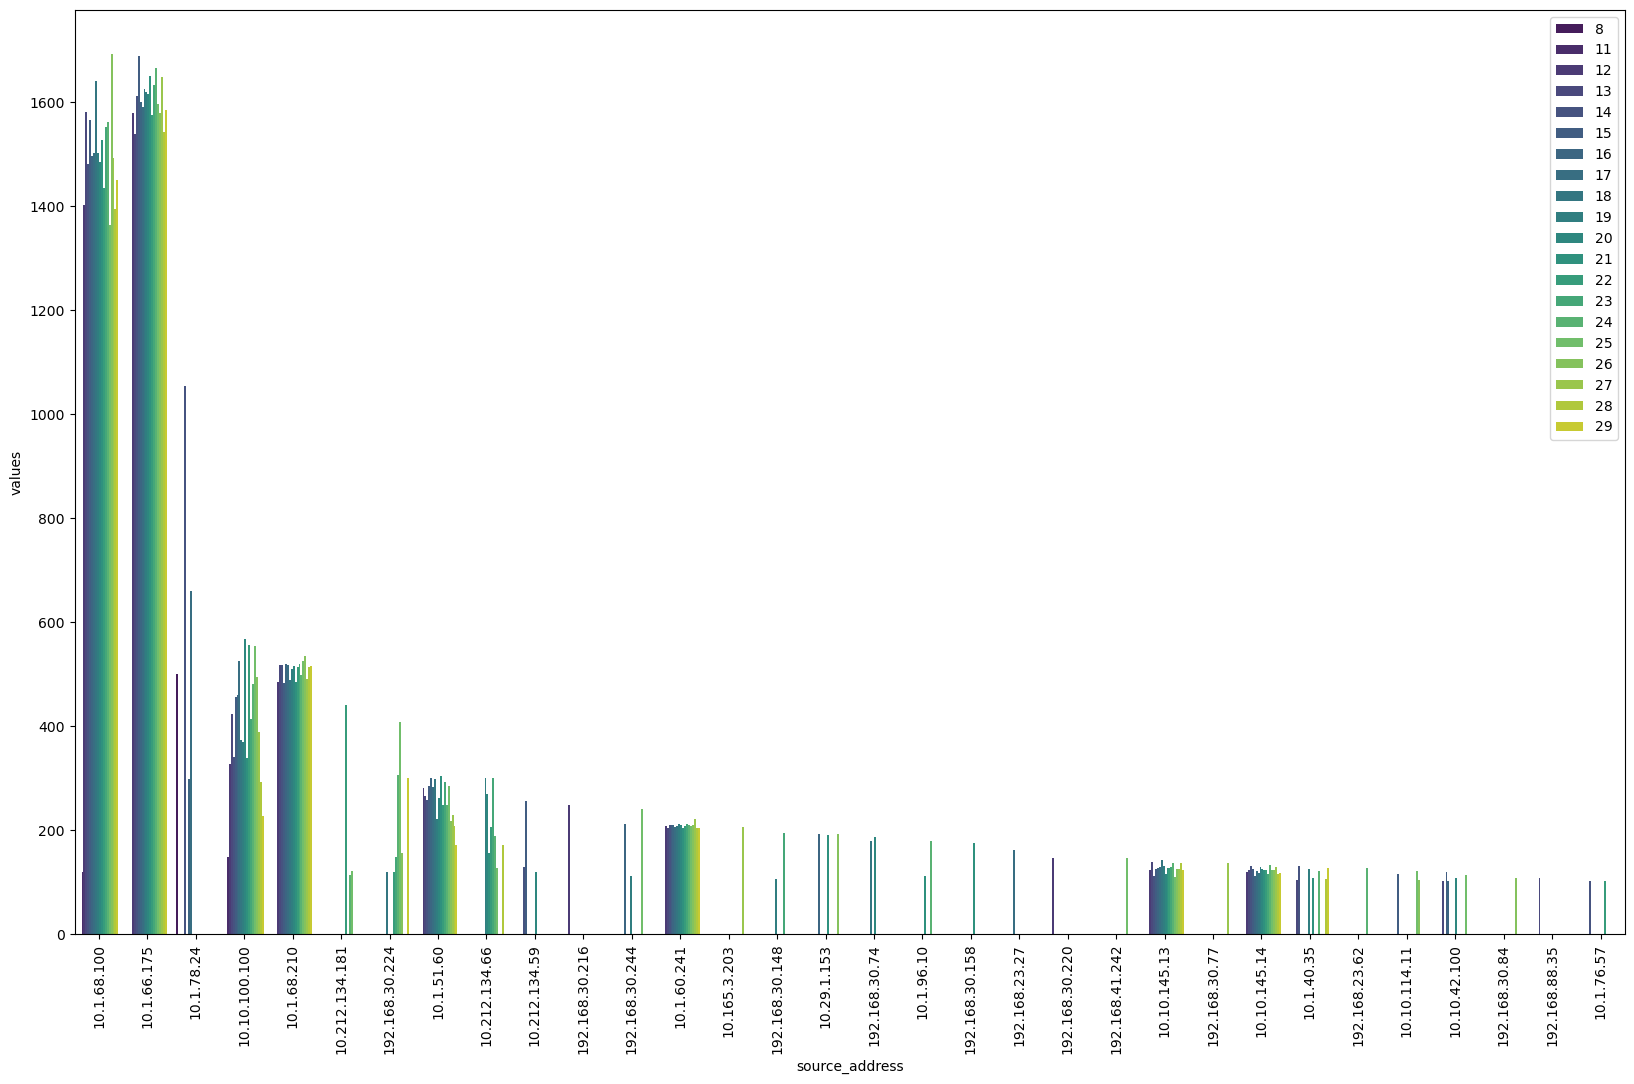

In [44]:

plt.figure(figsize= (20,12))
# Create the bar plot
sns.barplot(x='source_address', y='values', hue='minutes', data=df_reset[df_reset['values']>100], palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.legend(loc = 1)

# Show the plot
plt.show()

In [40]:
df_reset = groupby_sourcemin.reset_index(name = 'values')

In [34]:
df_reset[df_reset['values']>100]

,source_address,minutes,values
0,10.1.68.100,26,1693
1,10.1.66.175,15,1688
2,10.1.66.175,24,1666
3,10.1.66.175,21,1651
4,10.1.66.175,27,1649
...,...,...,...
205,10.1.40.35,13,103
206,10.10.42.100,16,102
207,10.10.42.100,13,101
208,10.1.76.57,14,101


In [41]:
df_reset[df_reset['values']>100].nunique()

source_address     32
minutes            20
values            150
dtype: int64

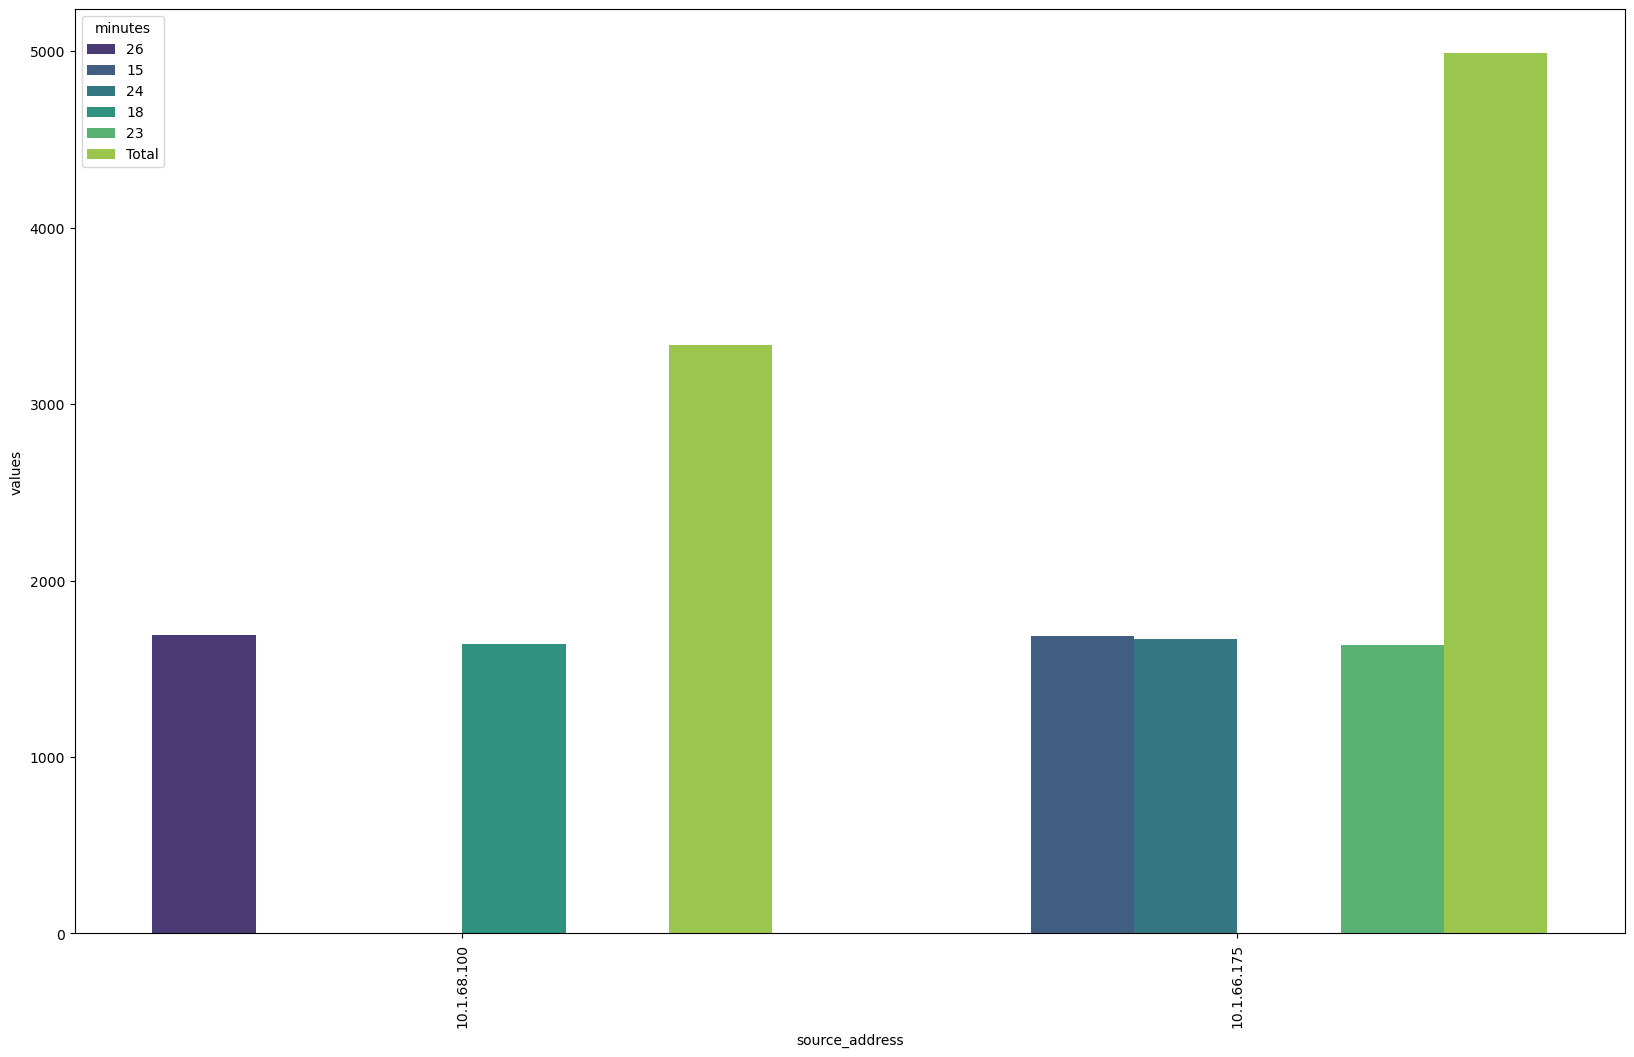

In [45]:
df_reset = pd.DataFrame({
    'source_address': ['10.1.68.100', '10.1.66.175', '10.1.66.175', '10.1.68.100', '10.1.66.175'],
    'minutes': [26, 15, 24, 18, 23],
    'values': [1693, 1688, 1666, 1640, 1633]
})

# Calculate total values for each source_address
total_values = df_reset.groupby('source_address')['values'].sum().reset_index()
total_values['minutes'] = 'Total'  # Label these bars as 'Total'

# Combine original data with total values data
combined_df = pd.concat([df_reset, total_values])

plt.figure(figsize=(20, 12))

# Create the clustered bar plot
sns.barplot(x='source_address', y='values', hue='minutes', data=combined_df, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()